In [1]:
import os
import pickle
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import pandas as pd


In [22]:
# DATA PARAMETERS

survey = "HERMES" # survey name
sample_rate = 1 # sample rate of the data
min_wv = 5000 # minimum wavelength of the data
max_wv = 6000 # maximum wavelength of the data
spec_dir = r"C:\Users\kentb\Desktop\PDM\data\Hermes\spectra\delCep_Hermes_spectra" # directory of the spectrum
rv_dir = r"C:\Users\kentb\Desktop\PDM\data\Hermes\RV\delCep_Hermes.csv" # directory of the RVs
results_dir = r"C:\Users\kentb\Desktop\PDM\data\products\Hermes\."

In [23]:
obs_data = Observations(survey=survey, sample_rate=sample_rate, min_wv=min_wv, max_wv=max_wv,
                        target_visits_lib=spec_dir)
df = pd.read_csv(rv_dir)
rv = df.rv.astype(float).values
e_rv = df.rv_err.astype(float).values
times = df.bjd.astype(float).values
times = times - int(min(times))

let's goooo
Using target_visits_lib: C:\Users\kentb\Desktop\PDM\data\Hermes\spectra\delCep_Hermes_spectra
Selected directory: C:\Users\kentb\Desktop\PDM\data\Hermes\spectra\delCep_Hermes_spectra


In [24]:
# Rearrange the RVs with the spectra

obs_data.rearrange_time_series(rv=rv, times=times)

In [25]:
# Preprocess the spectra

for i in obs_data.time_series.vals:
    i = i.SpecPreProccess()

In [10]:
print(obs_data.time_series.calculated_vrad_list)
print(obs_data.time_series.times)
print(obs_data.time_series.vals)

[-47.644368845900004, -50.571999999999996, -96.1276311541, -95.0716311541, -89.1068155771, -88.105, -80.375, -79.418, -73.3565532688, -72.46555326880001, -71.5363688459, -69.1723688459, -68.2725532688, -52.248815577100004, -51.773, -47.7183688459, -47.0744467312, -101.912815577, -100.885815577, -99.4258155771, -92.07381557709999, -85.7458155771, -65.0018155771, -64.058, -52.1082623082, -52.3474467312, -52.0141844229, -51.4558155771, -46.801, -47.0768155771, -83.2813688459, -82.6484467312, -81.7636311541, -66.36399999999999, -65.4211844229, -101.59700000000001, -100.587631154, -99.5816311541, -93.58781557709999, -92.4288155771, -83.97200000000001, -82.9978155771, -70.8453688459, -69.926, -63.306999999999995, -62.216, -61.275, -60.3001844229, -52.247, -51.4518155771, -84.43700000000001, -83.5638155771, -58.7558155771, -53.562184422899996, -53.16, -52.8684467312, -52.6254467312, -52.971631154099995, -53.0674467312, -53.2378155771, -53.0478155771, -48.9661844229, -48.2773688459, -47.693631

In [11]:
print(len(obs_data.time_series.times))
print(len(obs_data.time_series.vals))
print(len(obs_data.time_series.calculated_vrad_list))

146
146
146


In [32]:
# PERIODOGRAM PARAMETERS

baseline = int(obs_data.time_series.times[-1])
min_freq = 1/10 # Or maybe 1/2/baseline to be sure but let's test it that way.
max_freq = 1/2 # we don't expect more than one pulsation every two day so should be alright.
freq_range = (min_freq, max_freq) # frequency range of the periodograms
points_per_peak = 5
periodogram_grid_resolution = points_per_peak*max_freq*baseline # frequency resolution of the periodograms

In [33]:
# Choosing frequency range and frequency resolution for the periodograms.
obs_data.initialize_periodicity_detector(freq_range=freq_range,
                                        periodogram_grid_resolution=periodogram_grid_resolution)

In [34]:
obs_data.periodicity_detector.calc_GLS()

print("GLS done", flush=True)

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shape")

print("Shape done",flush=True)

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shift")

print("Shift done",flush=True)

file = open(os.path.join(results_dir, f"{spec_dir.rsplit('/',maxsplit=1)[-1]}_{str(min_wv)}_{str(max_wv)}.pkl"), 'wb')
pickle.dump(obs_data, file)
file.close()

GLS done


Shape done
Shift done


In [35]:
obs_data.periodicity_detector.period_truth = [5.366266]

In [20]:
print(obs_data.periodicity_detector.period_truth)

[5.366266]


In [37]:
print(obs_data.periodicity_detector.results_frequency.keys())

dict_keys(['GLS', 'shape_periodogram', 'shift_periodogram'])


Before cleaning peaks:  [0.49561564 0.48085495 0.46989404 0.46039459 0.45264889 0.44490318
 0.43701133 0.42166606 0.41143588 0.40383632 0.39609061 0.38819876
 0.38045305 0.37270734 0.36174644 0.35400073 0.34640117 0.33836317
 0.32740227 0.31965656 0.30840336 0.29890391 0.2895506  0.28122031
 0.27332846 0.26017537 0.2515528  0.23825356 0.23050786 0.22290829
 0.21589331 0.2020095  0.19411765 0.18637194 0.17862623 0.17073438
 0.16298867 0.15202777 0.14223602 0.13434417 0.12352941 0.11549141
 0.10584582]
After removing close peaks:  [0.48085495 0.46039459 0.43701133 0.42166606 0.40383632 0.39609061
 0.38819876 0.37270734 0.33836317 0.30840336 0.29890391 0.27332846
 0.2515528  0.23825356 0.22290829 0.21589331 0.2020095  0.18637194
 0.17073438 0.15202777 0.14223602 0.13434417 0.12352941 0.11549141
 0.10584582]
Current peak:  0.4808549506759322
Current peak to compare:  0.46039459261966564
Current harmonic:  2
Current harmonic:  3
Window harmonic 1 of 0.46039459261966564 found at 0.4808549506

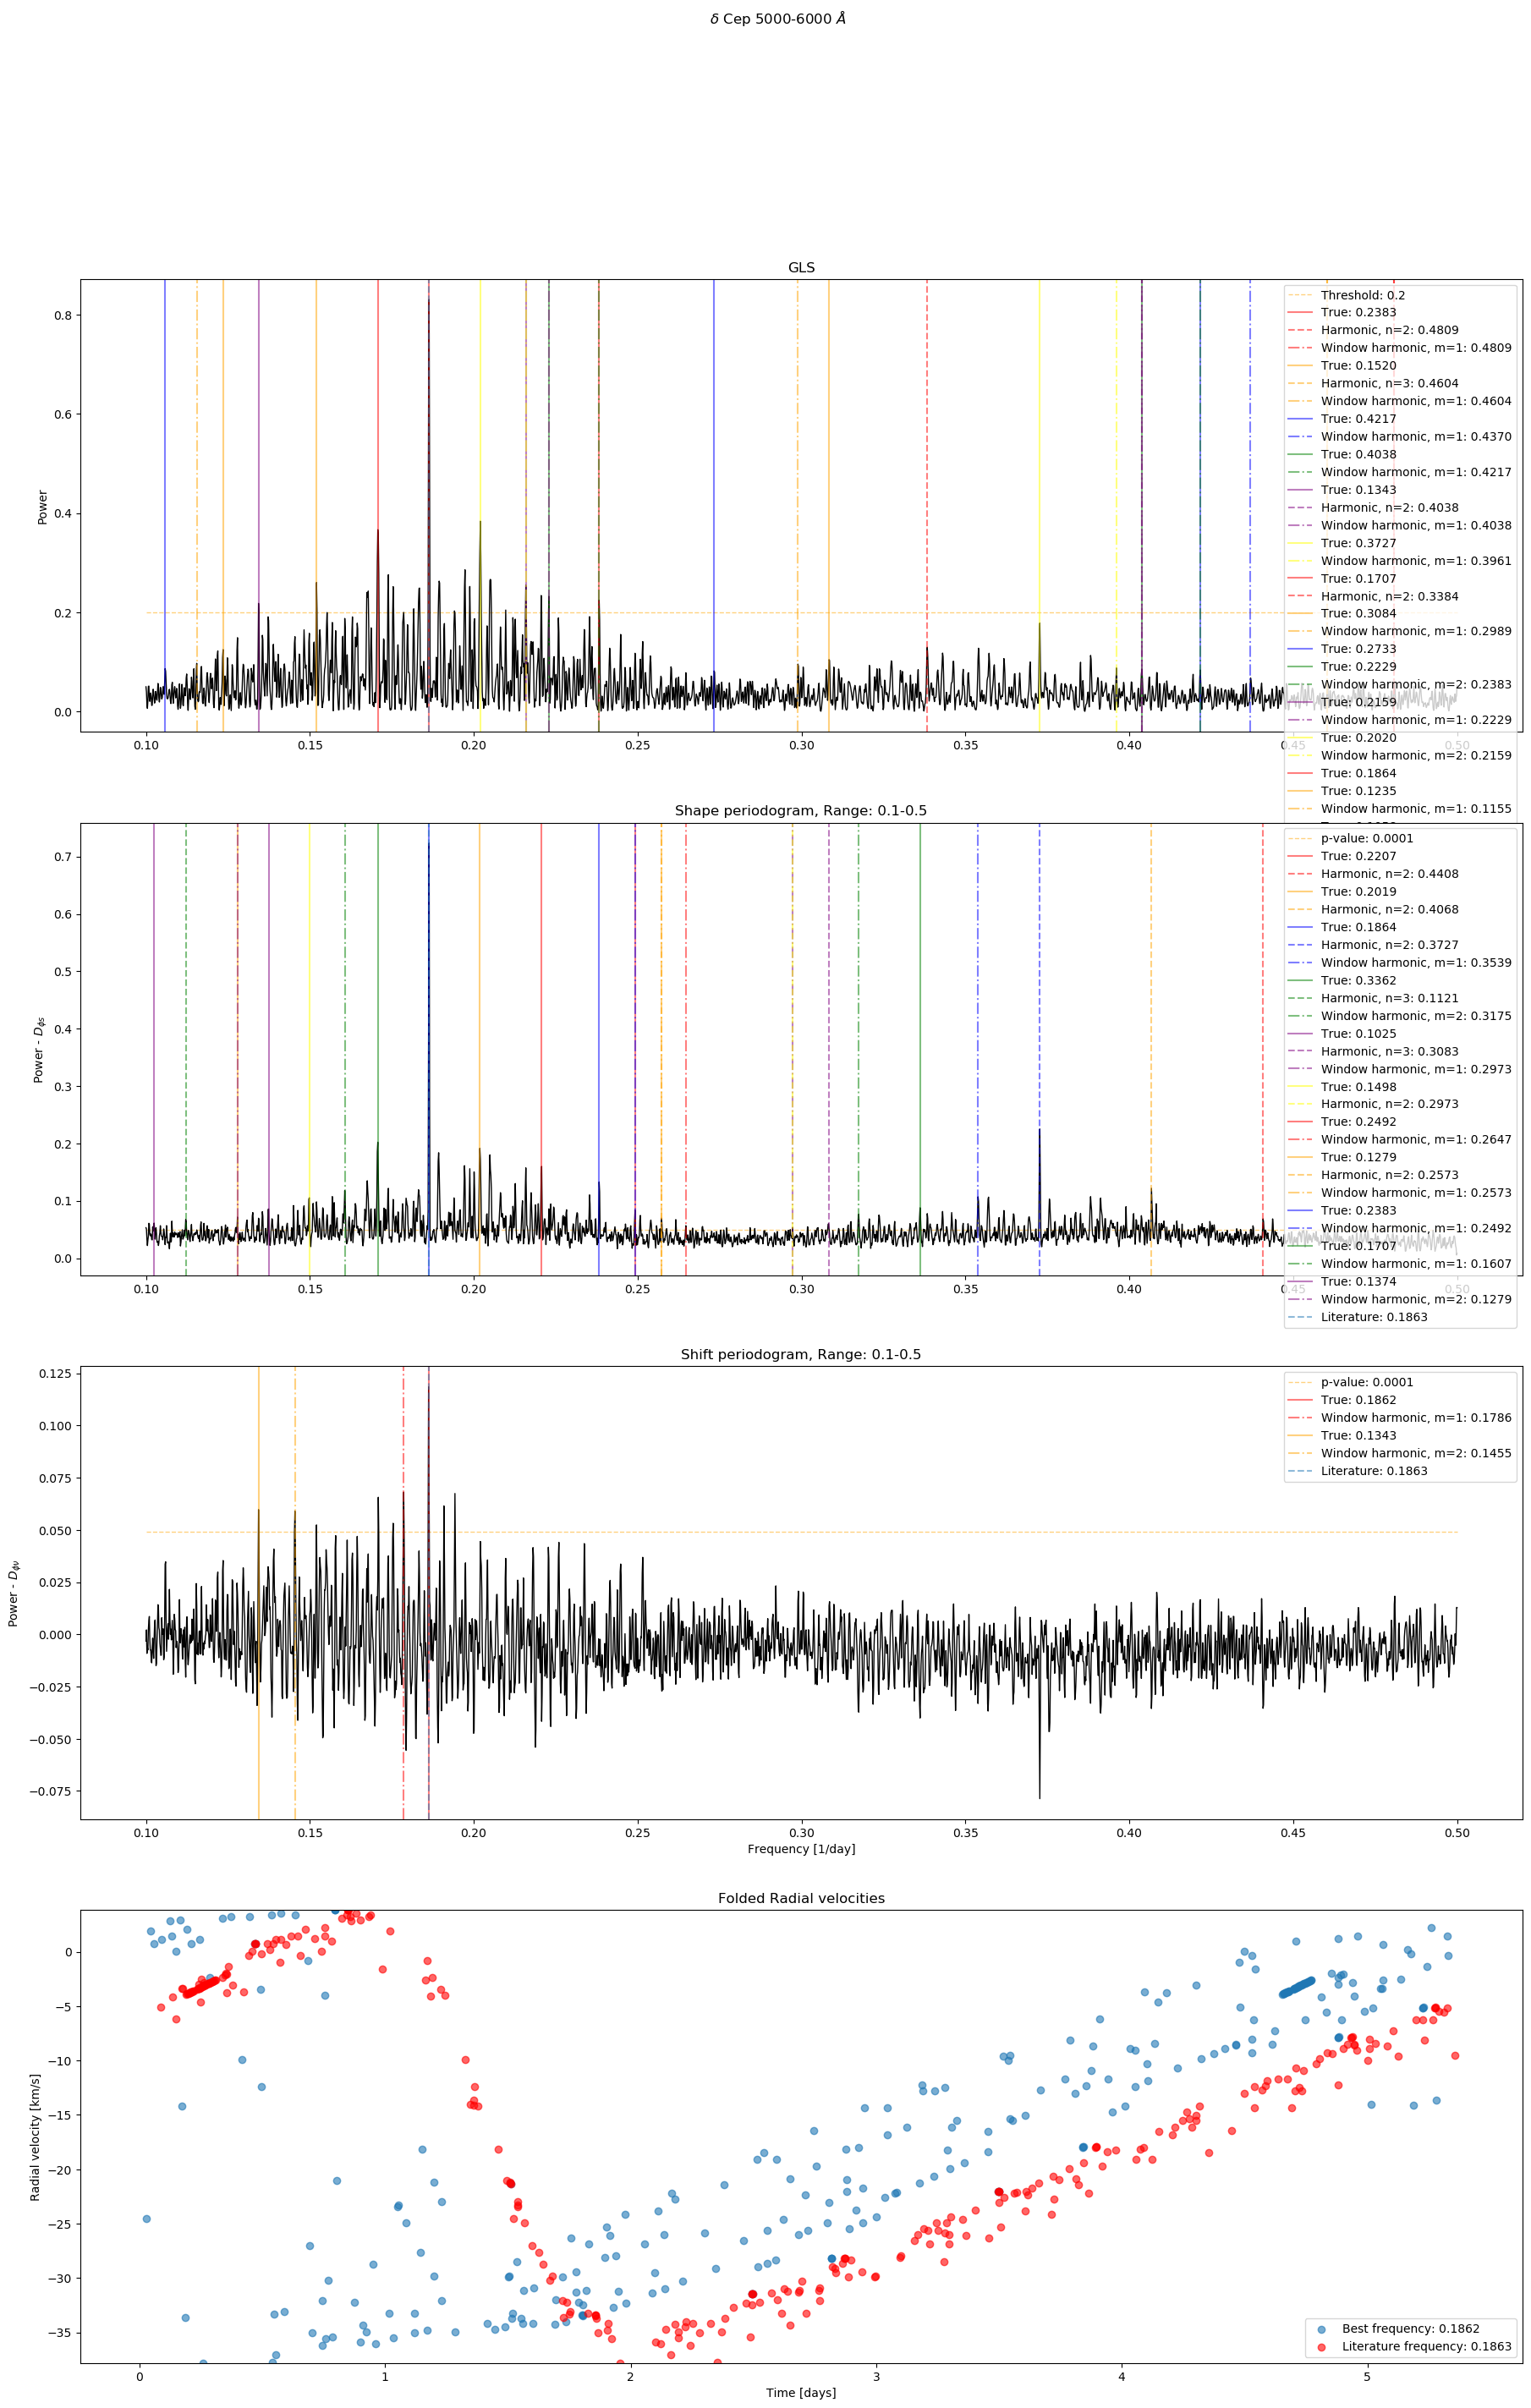

In [36]:
# Plotting the periodograms

obs_data.periodicity_detector.plot_periodograms(annotate_pval=[1e-4], plot_rv=True,title=r"$\delta$ Cep 5000-6000 $\AA$", log_scale=False, plot_peaks=True)

In [3]:
# Load the data

path = os.path.join(r'C:\Users\kentb\Desktop\PDM\data\products\Hermes', 'delCep_Hermes_5000_6000.pkl')
file = open(path, "rb")
obs_data = pickle.load(file)
file.close()

In [4]:
obs_data.periodicity_detector.period_truth = [5.366266]
# obs_data.periodicity_detector.period_truth = None

Before cleaning peaks:  [0.49561564 0.48085495 0.46989404 0.46039459 0.45264889 0.44490318
 0.43701133 0.42166606 0.41143588 0.40383632 0.39609061 0.38819876
 0.38045305 0.37270734 0.36174644 0.35400073 0.34640117 0.33836317
 0.32740227 0.31965656 0.30840336 0.29890391 0.2895506  0.28122031
 0.27332846 0.26017537 0.2515528  0.23825356 0.23050786 0.22290829
 0.21589331 0.2020095  0.19411765 0.18637194 0.17862623 0.17073438
 0.16298867 0.15202777 0.14223602 0.13434417 0.12352941 0.11549141
 0.10584582]
After removing close peaks:  [0.48085495 0.46039459 0.43701133 0.42166606 0.40383632 0.39609061
 0.38819876 0.37270734 0.33836317 0.30840336 0.29890391 0.27332846
 0.2515528  0.23825356 0.22290829 0.21589331 0.2020095  0.18637194
 0.17073438 0.15202777 0.14223602 0.13434417 0.12352941 0.11549141
 0.10584582]
Current peak:  0.4808549506759322
Current peak to compare:  0.46039459261966564
Current harmonic:  2
Current harmonic:  3
Window harmonic 1 of 0.46039459261966564 found at 0.4808549506

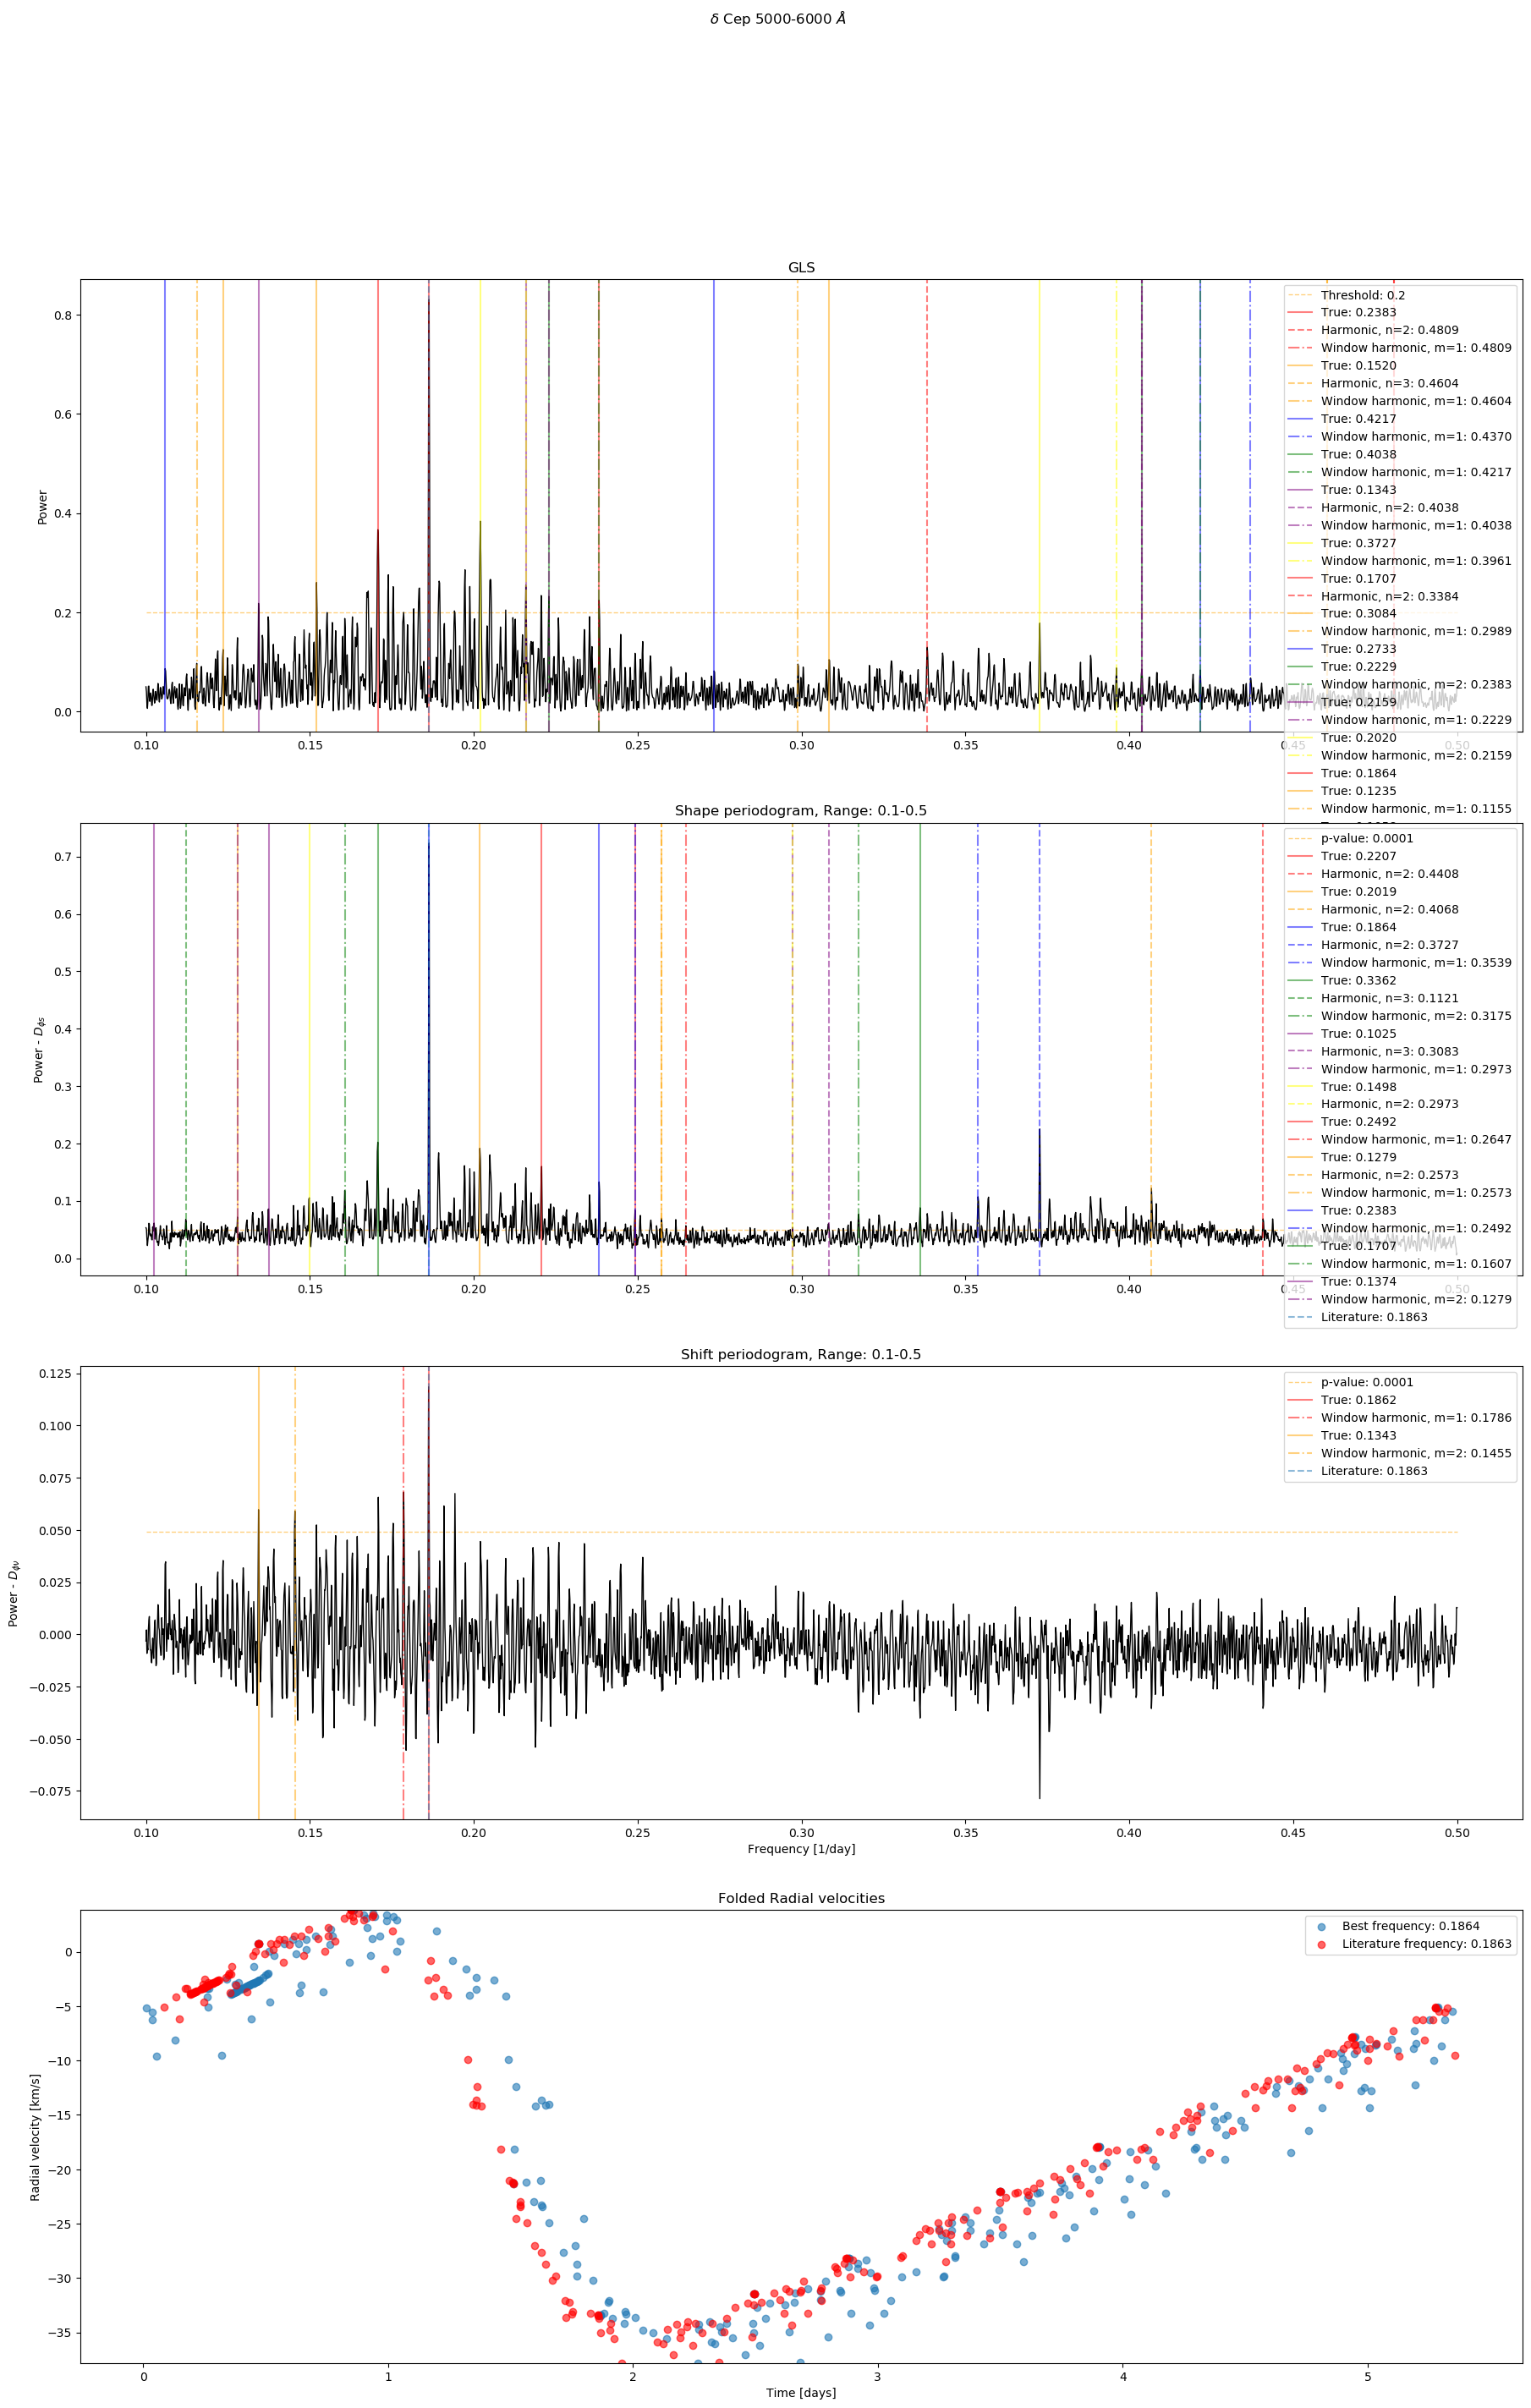

In [7]:
obs_data.periodicity_detector.plot_periodograms(annotate_pval=None, plot_rv=True,title=r"$\delta$ Cep 5000-6000 $\AA$", log_scale=False, plot_peaks=True)